<a href="https://colab.research.google.com/github/datawarriorrob/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

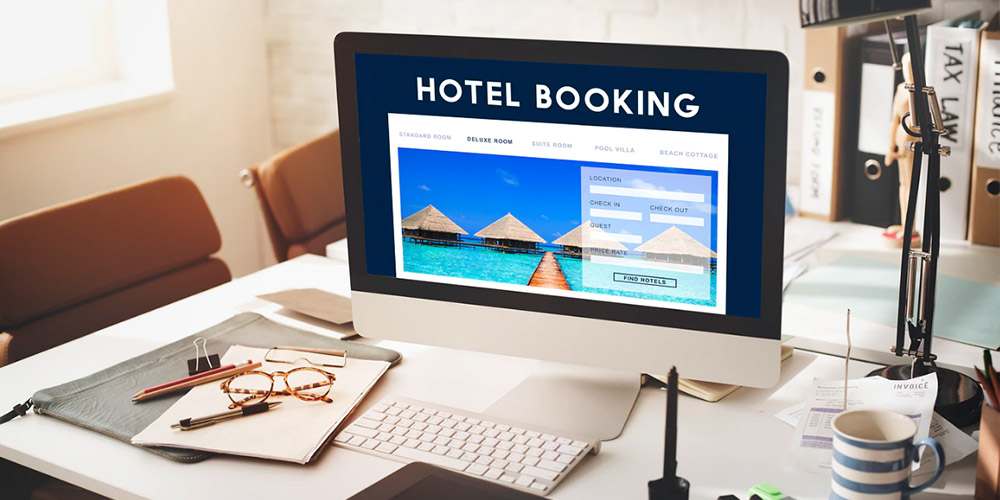

#*INTRODUCTION & OBJECTIVE OF THE CHASE*

Vacations, business stay or a casual trip to a new city, hotel bookings are mandatory and each one of us desires to optimize our stay. Optimization, for someone could be booking a hotel where he/she pays less for a good deal, or maybe just getting the only luxurious suite, in a 7-star hotel during a non-peak period. 

We are given a Hotel Booking dataset, which stores tabular information about the guests' booking pattern, stay duration, 
choice of meal and much more for a consecutive year range and we’ll be performing a profound analysis on the dataset, to dig out details and predict a few trends pertaining to the data. Firstly, I don't want to pay any surged random price for my booking rather, I will be happy to pay an optimized value for my stay. Secondly, I want my vacation to be safe, as I am accompanying my loved ones, so I would prefer a hotel with less crowd and well equipped with health and safety measures. 

Our analysis, would be capable of helping prospective guests in choosing the right hotel, right stay duration and much more for their stay and moreover, would also be introspecting for hotel management in bringing out changes (if, any) in their services for the guests.

Let's begin the chase!





#Nomenclature

Naming our dataframe is very crutial for any data analysis project as you have to call the dataframe time and again for every set of operation which are to be performed for the in-depth analysis. 

In this case, our copy of the dataframe will be called 'df' , simple and easy to recall. 

#*STEP-1*: IMPORTING DATA MANIPULATION,CLEANING AND VISUALISATION LIBRARIES

---




In [ ]:
#importing data manipulation, cleaning and visualisation library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#*STEP-2*: SETTING UP A CONNECTION WITH THE DRIVE DATA

In [ ]:
#connecting the google colab notebook with the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#*STEP-3*: IMPORTING DATASET INTO NOTEBOOK

In [ ]:
#importing the data set to be analysed
file_path= '/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis - Robin Dubey/Hotel Bookings.csv'
dataframe= pd.read_csv(file_path)

In [ ]:
#making the copy of our dataframe, to keep the original dataframe untouched and unaffected by the operations performed
df= dataframe.copy()

#*STEP-4*: TAKE A QUICK GLIMPSE OF THE DATASET

In [ ]:
#printing the head of the data which gives us top 5 rows 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#verifying the dataset shape before proceeding ahead 
#shape gives us count of rows and columns as (rows,columns)
df.shape

(119390, 32)

In [ ]:
#Taking quick info of the data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe() #summarizing the data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#taking quick information about the dataset's non-null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

* Takeaway 1: Colmuns like children, country, agent and company have multiple non-null values, which might impact our further analysis on the dataframe
* Takeaway 2: Agent and company columns have high null values, then these can just be dropped or can be filled in with some vale. In this case, we will fill those NaN values in these columns with '0.0'. 



#*STEP-5: DATA CLEANING* /MISSING VALUE TREATMENT

In [ ]:
#filling NaN values in agent and company columns with 0.0 
df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [ ]:
df.isna().sum() #recheck your dataframe information of 'NaN' values

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ


* Now, we are just left with null values in children and country with 4 and 488 null values repectively. 
* Again we can drop these columns or fill these NaN values with the most occurance of a value or the mean.



In [ ]:
#filling null values in children and country columns simultaneously 
df['country'].fillna(df['country'].mode().to_string(), inplace=True)
df['children'].fillna(round(df['children'].mean()), inplace=True)
#This finishes our cleaning step for the data analysis

In [ ]:
df.isnull().sum() #cross-check the final dataset for null values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
#let's also check the data types of our dataframe
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

*Cheers! we are done with the data cleaning process.

#*STEP 6: HOTEL QUEST*

* Which hotel is more preferred by customers?
* Which hotel is preferred by a large family?


In [ ]:
#first let us know the type of hotels
df['hotel'].value_counts()


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

**So, we have got only 2 types of hotels namely City Hotel and Resort Hotel**

Text(0.5, 1.0, 'Types of Hotel')

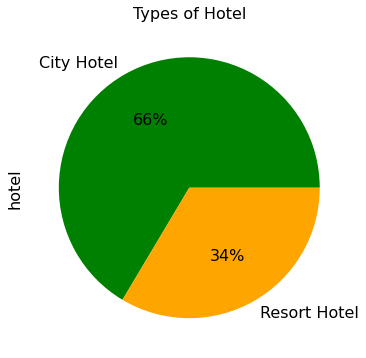

In [ ]:
#let's use data visualization tools to identify between there booking share
plt.rcParams['figure.figsize']= (6,6)  #locking up figure size

#Setting up kind of chart to pie, putting custom colors, using auto percentage value to know share of each slice of pie and font size of 14 
df['hotel'].value_counts().plot(kind='pie', colors=['green', 'orange'], autopct='%.0f%%', fontsize= 16)
plt.ylabel('hotel' , fontsize=16)
plt.title('Types of Hotel', fontsize=16)

* So by seeing above visualisation, now we know that Resort Hotel has a booking share of around 34 percent and City Hotel has a share of 66 percent. **Hence, City Hotel is more preferred over Resort Hotel by customers.** 
* This is overall bookings made including canceled & not_canceled. 

In [ ]:
#Now lets see which hotel is preferred by large families 
#To find that, let's find the count of adults and childrens in each of the 2 hotels or may be the average/mean value will help? let's see.
#in the dataframe adult, let's groupby them on the basis of type of hotel they chose 
df['adults'].groupby(df['hotel']).mean()

hotel
City Hotel      1.850977
Resort Hotel    1.867149
Name: adults, dtype: float64

In [ ]:
df['children'].groupby(df['hotel']).mean()

hotel
City Hotel      0.091365
Resort Hotel    0.128682
Name: children, dtype: float64

Yes, the mean value helped us figuring our the mean count of adults and children in each of the hotels. **Hence, we can conclude, that Adults and childrens preferred Resort Hotel over City Hotel.**

In [ ]:
#Find the max value to know which hotel does the large families prefer. I guess, Resort hotel, by seeing its mean. Let's explore!
df['adults'].groupby(df['hotel']).max() 

hotel
City Hotel       4
Resort Hotel    55
Name: adults, dtype: int64

In [ ]:
df['children'].groupby(df['hotel']).max()

hotel
City Hotel       3.0
Resort Hotel    10.0
Name: children, dtype: float64

*  **Indeed! it's Resort Hotel with max adult count of 55 and max children count of 10 , which makes it a preferable choice for larger group of people or families.** But, we might not know the reason if it's related to the booking values aka hotel charges, as our data excludes any such information.

#*STEP-7: CANCELLATION OF BOOKING QUEST*

Many of our plans get postponed or cancelled over the lead_time, following unavoidable circumstances. Let's deep dive in the cancellation of booking analysis for the current data and figure out if it has happened or not and if it did then which hotel has been affected the most.  

In [ ]:
#adding a column for canceled/non-canceled values (1,0) replaced with (canceled, non_canceled) 
#this will be useful on the later stage of plotting graph

df['cancelation'] = df.is_canceled.replace(to_replace= [1,0] , value= ['canceled', 'not_canceled']) 

In [ ]:
df.head() #take a glimpse of the head of the dataframe to see the changes

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,not_canceled
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,not_canceled
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,not_canceled
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,not_canceled
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,not_canceled


* a new column 'cancelation' has been added to the dataframe with values 
canceled and not_canceled

Let's see **how many booking were canceled by the cutomers?**

Text(0, 0.5, 'count')

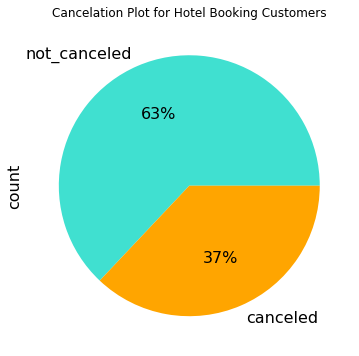

In [ ]:
df_canceled= df['cancelation'] #alloting a name for applying visualization 
df_canceled.value_counts().plot(kind='pie', colors=['turquoise', 'orange'], autopct='%.0f%%', fontsize= 16)
plt.title('Cancelation Plot for Hotel Booking Customers')
plt.ylabel( 'count' , fontsize=16)

* Takeaway: The cancelation plot shows that the total canceled bookings are fewer than not_canceled bookings i.e. **37 percent of the bookings were canceled and 63 percent of them were not_canceled.** 

* Now, moving on to find which hotel experienced more cancelations than the other

In [ ]:
 #this can be acheieved by taking a groupby on hotel category where cancelation is positive
cancelation_by_hotel= df[df['cancelation']== 'canceled'].groupby(['hotel']).size()
cancelation_by_hotel

hotel
City Hotel      33102
Resort Hotel    11122
dtype: int64

Text(0.5, 1.0, 'Count of Cancelations: City Hotel vs Resort Hotel')

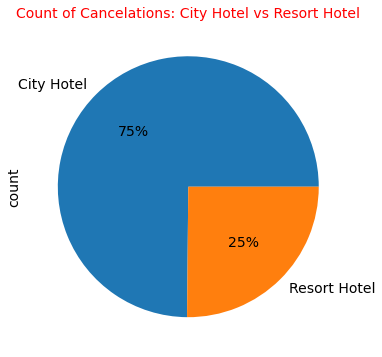

In [ ]:
#let's see it in a graph 
cancelation_by_hotel.plot( kind='pie' , fontsize= 14, autopct='%.0f%%')
plt.ylabel('count', fontsize= 14)
plt.title('Count of Cancelations: City Hotel vs Resort Hotel', fontsize= 14, color= 'Red')

* Hence, there has been more cancelations for City Hotel compared to Resort Hotel i.e. City Hotel has 3/4th of total cancelations or thrice the cancelations of Resort Hotel. **But is it bad?**

* Let's Calculate percentage of cancelation over total bookings for each hotel to know if the cancelations done on City Hotel by the customers is Bad or not, against the Bookings done the customers. 

In [ ]:
#calculating percentage of cancelations in City Hotel against to the booking done 
#percentage_of_cancelations_hotelname= Total cancelations/ Total bookings
percentage_of_cancelations_CityHotel= cancelation_by_hotel['City Hotel']/ df['hotel'].value_counts() ['City Hotel'] *100
percentage_of_cancelations_CityHotel

41.72696331778646

In [ ]:
percentage_of_cancelations_ResortHotel= cancelation_by_hotel['Resort Hotel']/ df['hotel'].value_counts() ['Resort Hotel'] *100
percentage_of_cancelations_ResortHotel

27.763354967548675

* **As cancelations against booking as a percent for City Hotel is higher than the Resort Hotel, this should be a cause for worry for the City Hotel Management.**

Was Just thinking to get a plot for bookings done which are not_canceled. Let's try it out!

In [ ]:
df_not_canceled=df[['hotel', 'is_canceled']][ df['is_canceled']==0].groupby(['hotel']).count()
df_not_canceled

,is_canceled
hotel,
City Hotel,46228
Resort Hotel,28938


Text(0.5, 1.0, 'Not_canceled Bookings for individual hotels')

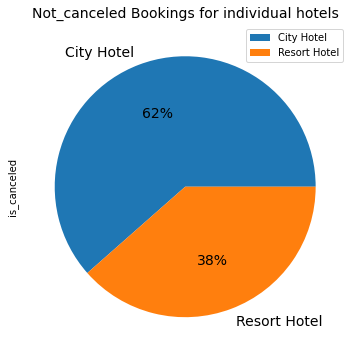

In [ ]:
plt.rcParams['figure.figsize']= 6,6
df_not_canceled.plot( kind= 'pie', fontsize= 14, autopct='%.0f%%' , subplots=True) # ploting pie-charts with autopct gives you a better comparision through percentage
plt.title('Not_canceled Bookings for individual hotels', fontsize= 14)

Takeaway: When we used the not_canceled booking data, the out values changed, i.e. the non-canceled booking share of each hotel i.e. City Hotel and Resort Hotel becomes 62% and 38% respectively. Instead of 66% and 34% from the total bookings made which had both canceled and not_canceled bookings. 

#*STEP-8: ARRIVAL QUEST*

As we are given the data for 3 consecutive years starting from 2015, 2016 and 2017. I am just wondering about the percentage of Bookings made each year..Let's not wonder anymore like lazybugs!

In [ ]:
#I am going to use the parent dataframe for this 
df_hotel_by_year= df[['arrival_date_year', 'hotel']].value_counts().groupby('arrival_date_year').sum()

Text(0, 0.5, 'Count of Arrival')

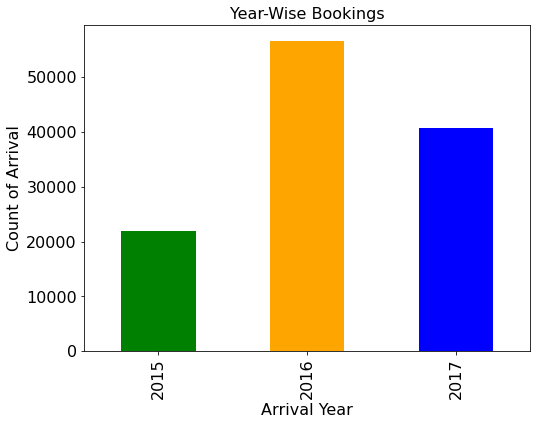

In [ ]:
plt.rcParams['figure.figsize']= (8,6)
df_hotel_by_year.plot(kind= 'bar', color= ['green', 'orange', 'blue'], fontsize=16)
plt.title('Year-Wise Bookings', fontsize=16)
plt.xlabel('Arrival Year', fontsize=16)
plt.ylabel('Count of Arrival', fontsize=16)

* Takeaway 1 : Most arrivals are observed in the year of 2016 i.e. about 2.5x the previous year. But, it also observered a steep fall in the subsequent year. Should be a point of worry for the management? 
* Takeaway 2 : But, this is overall data, what about individual hotels?


Text(0, 0.5, 'Count of Arrival')

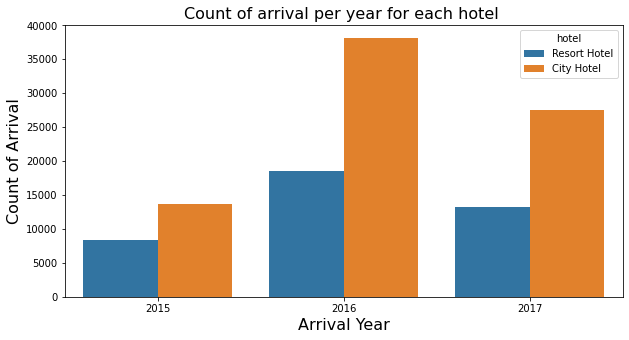

In [ ]:
#Plotting the arrival count per year 2015,2016,2017 in order
plt.rcParams['figure.figsize']= (10,5)
sns.countplot(data = df, x = 'arrival_date_year', hue = 'hotel')
plt.title('Count of arrival per year for each hotel ',fontsize=16)
plt.xlabel('Arrival Year', fontsize=16)
plt.ylabel('Count of Arrival', fontsize=16)



Text(0, 0.5, 'Count')

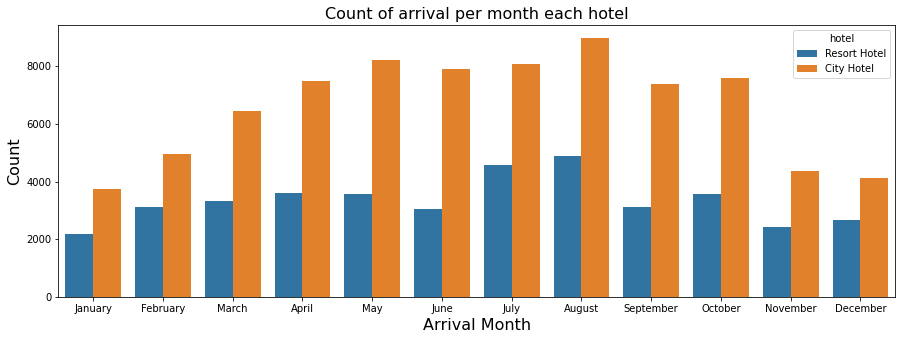

In [ ]:
#Plotting arrival count over months
plt.rcParams['figure.figsize']= (15,5)
sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order= [ 'January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])
plt.title('Count of arrival per month each hotel',fontsize=16)
plt.xlabel('Arrival Month', fontsize=16)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

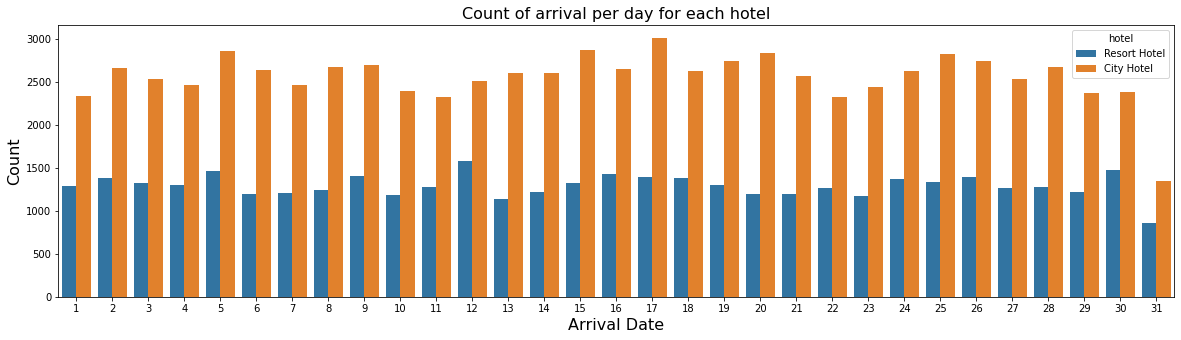

In [ ]:
#Plotting arrival count over months
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x = 'arrival_date_day_of_month', hue = 'hotel')
plt.title('Count of arrival per day for each hotel', fontsize = 16)
plt.xlabel('Arrival Date', fontsize=16)
plt.ylabel('Count', fontsize=16)


* Takeaway 1: **Month of August saw major footfalls/arrivals in either of the hotels**
* Takeaway 2: Days of the month have no such trend in the arrivals.

#Found no such trend in arrival on days of month. Let's try to analyse some more data in the columns of weekend and weekday stays. 

(0.5, 20.0)

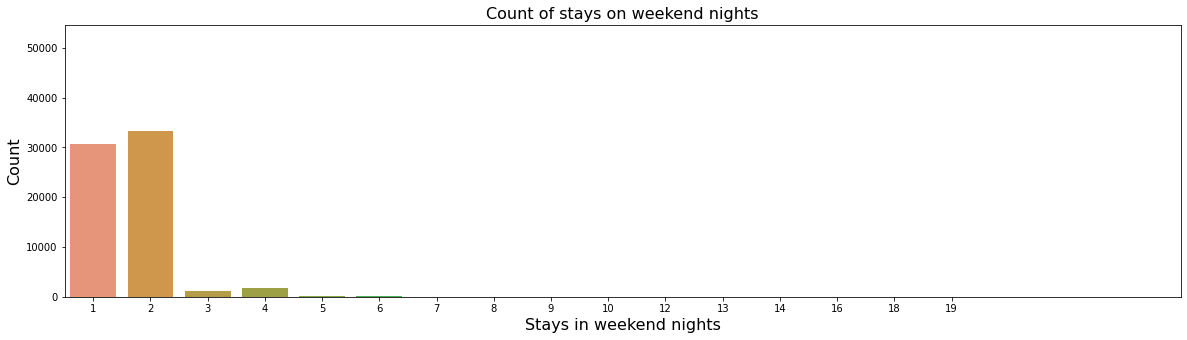

In [ ]:
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x = 'stays_in_weekend_nights')
plt.title('Count of stays on weekend nights', fontsize=16)
plt.xlabel('Stays in weekend nights', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim(0.5,20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.5)

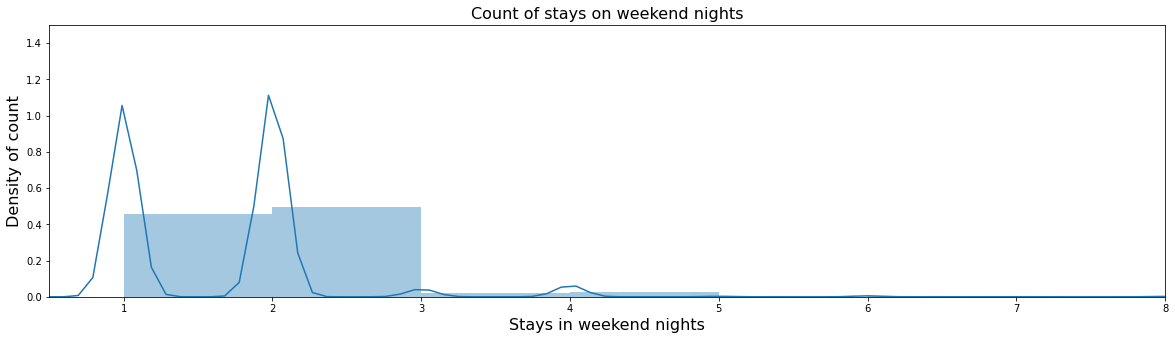

In [ ]:
#let's also trying plotting a distribution plot and see which gives better details
sns.distplot(df, x = df['stays_in_weekend_nights'], bins=[1, 2, 3, 4, 5, 6, 7]) 
plt.title('Count of stays on weekend nights', fontsize=16)
plt.xlabel('Stays in weekend nights', fontsize=16)
plt.ylabel('Density of count', fontsize=16)
plt.xlim(0.5,8)
plt.ylim(0,1.5)

* The density of count is high at values 1 and 2, hence most people arrived/stayed for 1 or 2 weekends nights and fewer for more weekend nights
* I like the countplot more than the distribtion plot, we might try to use it later.

Text(0, 0.5, 'Count')

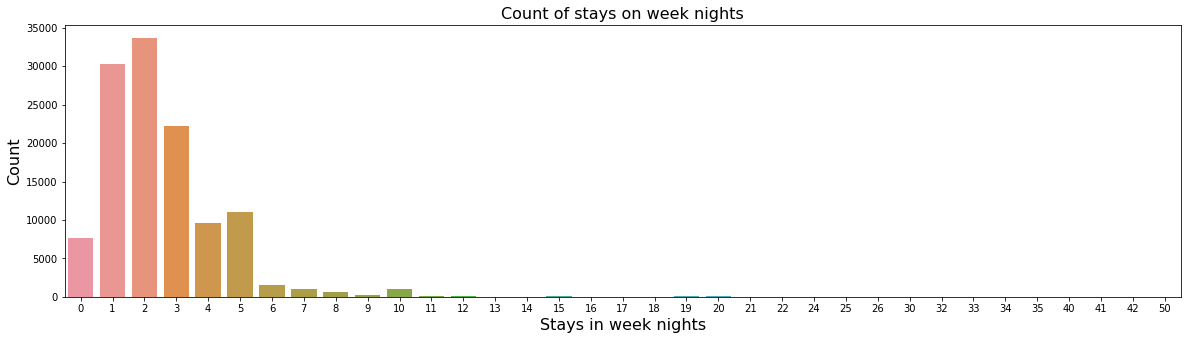

In [ ]:
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x = 'stays_in_week_nights')
plt.title('Count of stays on week nights', fontsize=16)
plt.xlabel('Stays in week nights', fontsize=16)
plt.ylabel('Count', fontsize=16)

* Finally, we have got something, It was hiding too deep. **We can culminate that the arrival of guests is more on week days nights than in weekends nights.**

* Now, let's explore the category of guests (adult, children, babies) in each hotel. This will help us tagging each hotel. 

#*STEP-9: GUEST QUEST*

In [ ]:
#identifying adults count from the data
df_adults= df[['hotel','adults']][df['adults']>0].groupby(['hotel']).count()
df_adults

,adults
hotel,
City Hotel,78940
Resort Hotel,40047


Text(0.5, 1.0, 'Count of adults')

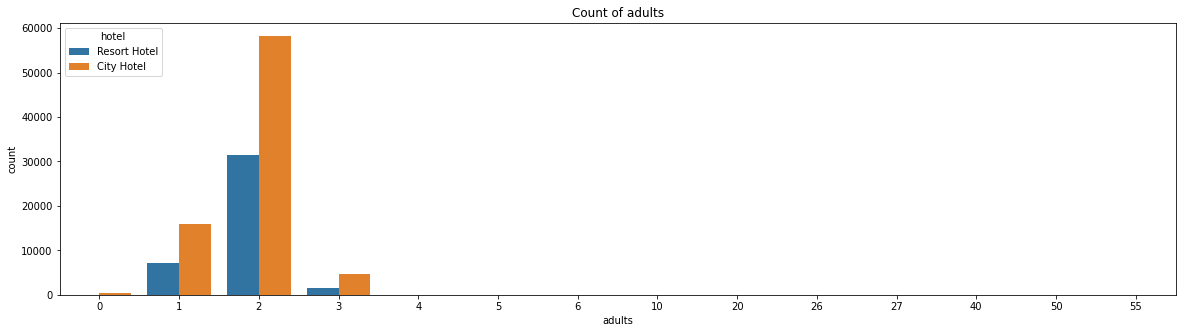

In [ ]:
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x= 'adults', hue= 'hotel').set_title('Count of adults')  #Visualisation of adults

In [ ]:
#identifying children count from the data
df_children= df[['hotel','children']][df['children']>0].groupby(['hotel']).count()
df_children

,children
hotel,
City Hotel,5106
Resort Hotel,3484


Text(0.5, 1.0, 'Count of children')

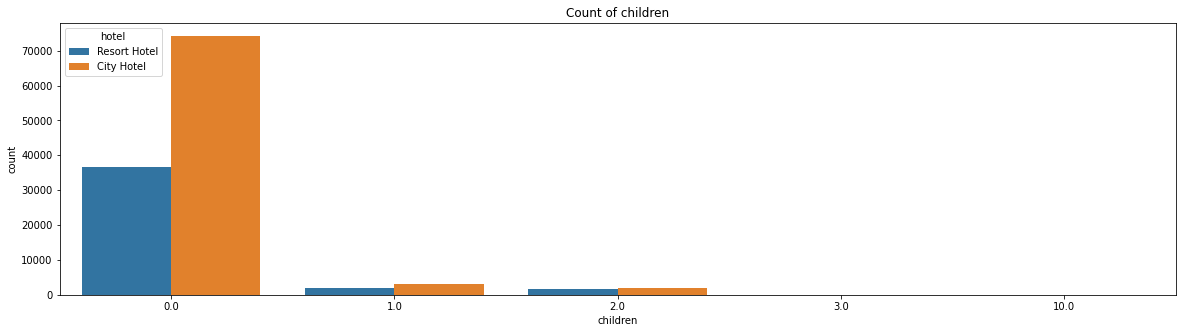

In [ ]:
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x= 'children', hue= 'hotel').set_title('Count of children')  #Visualisation of children

In [ ]:
#identifying babies count from the data
df_babies= df [['hotel','babies']] [df['babies']>0].groupby(['hotel']).count()
df_babies

,babies
hotel,
City Hotel,369
Resort Hotel,548


Text(0.5, 1.0, 'Count of babies')

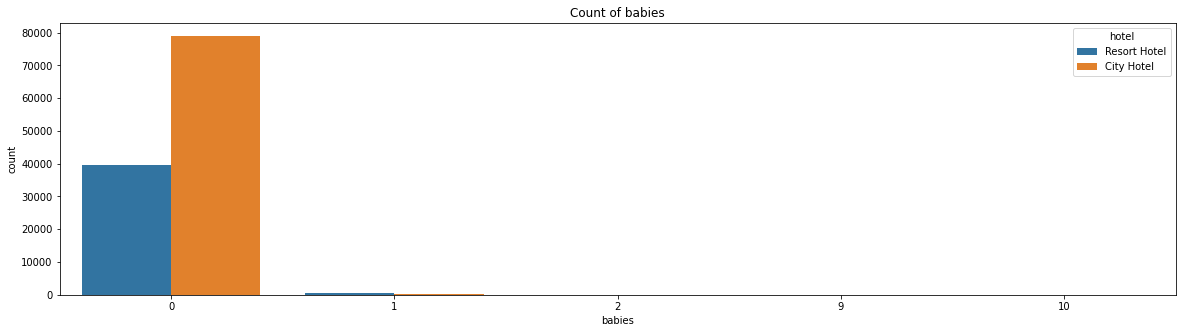

In [ ]:
plt.rcParams['figure.figsize']= (20,5)
sns.countplot(data = df, x= 'babies', hue= 'hotel').set_title('Count of babies')  #Visualisation of babies

* Takeaway 1 : Majorty of the guests come in couple as we can see from count of adults plot, both the hotels acheive peak at 2.0 and spoecifically **City Resort could be tagged as a "Duo/Couple-Friendly Hotel"** 
* Takeaway 2: Guests bringing children with them have more preference to City Hotel. Hence, **City Hotel could also be tagged as a "Children-Friendly Hotel"**
* Takeaway 3: Guests bringing babies with them have no such preference over Hotels, but a bit more towards Resort Hotel. So, **Resort Hotel could be tagged as "Babies-Friendly Hotel"** 

Note: Two people together can be a couple i.e M+F or they can be just two people checked-in together so, irrespective of their gender they can be called a Duo. 

Let us deep dive in with an information realted to the arriving countries of these guests

In [ ]:
#guests who have not canceled their booking will only be our case analysis data
#Grouping by countries of the guests 
df_country_guests= df[['country', 'hotel']][df['cancelation'] == 'not_canceled'].groupby(['country']).count()   
df_country_guests_top10= df_country_guests.sort_values( by= 'hotel', ascending=False).head (10)

In [ ]:
df_country_guests_top10 #top 10 countries with max guests 

,hotel
country,
PRT,21071
GBR,9676
FRA,8481
ESP,6391
DEU,6069
IRL,2543
ITA,2433
BEL,1868
NLD,1717


Text(0.5, 1.0, 'Top 10 countries by visitors')

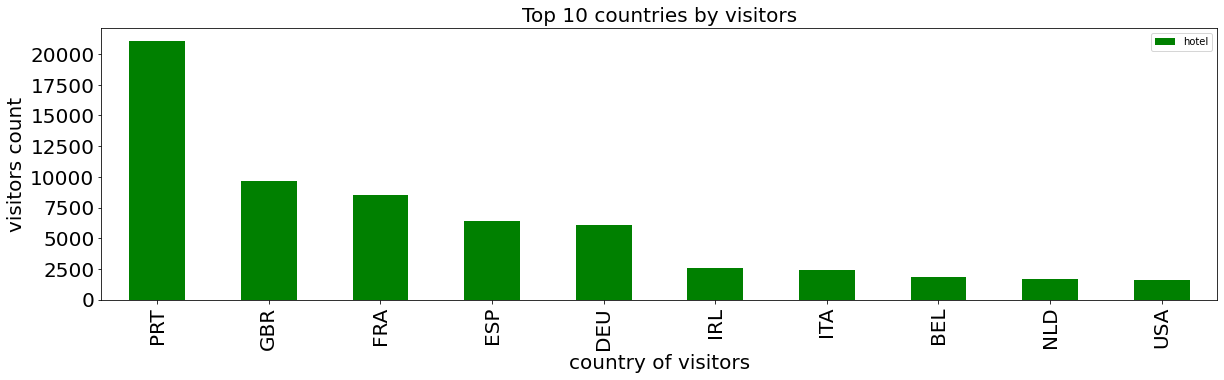

In [ ]:
plt.rcParams['figure.figsize']= (20,5)
df_country_guests_top10.plot(kind= 'bar' , fontsize=20, color= ['green'])
plt.ylabel('visitors count', fontsize=20)
plt.xlabel('country of visitors', fontsize=20)
plt.title('Top 10 countries by visitors', fontsize=20)

* **The plot shows that the arrival of guests is pretty high (almost 75 percent and above) from the countries with code: PRT, GBR, FRA,ESP and, DEU**

Now, I am wondering if these guests are repeating guests or the first time guest? 
Voila! we have the data to figure out that, let's rush to it.

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

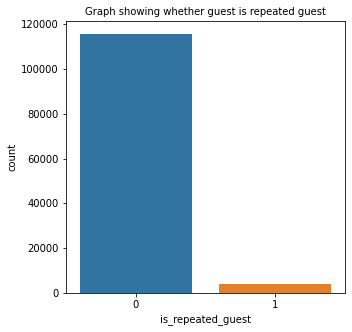

In [ ]:
#Creating the visualisation using the countplot
plt.rcParams['figure.figsize']= (5,5)
sns.countplot(data = df, x = 'is_repeated_guest')
plt.title('Graph showing whether guest is repeated guest', fontsize = 10)


* In the above graph, 0 is not-repeated and 1 is repeated, therefore, we can culminate that there are a very few guests who are repeated, and mostly are non-repeated or the first time guests. 
* This data output shall be considered at the priority by the Management Team. There might  be some Service and/or Marketing tactic that can help the hotels to increase their repeated guests. 

* Also, let's see the count of repeated guest in each hotel. 

In [ ]:
df[['hotel', 'is_repeated_guest']][df['is_repeated_guest']==1].groupby(['hotel']).count()

,is_repeated_guest
hotel,
City Hotel,2032
Resort Hotel,1778


So, if we quickly compare the repeated guest per total bookings then Resort Hotel will definitely be accredited high. 

Now, As we know our guests let's see their duration of stay, so that we can know the optimal stay duration in overall and by each hotel as well.

# *STEP-10 : DURATION QUEST*

Text(0, 0.5, 'Count')

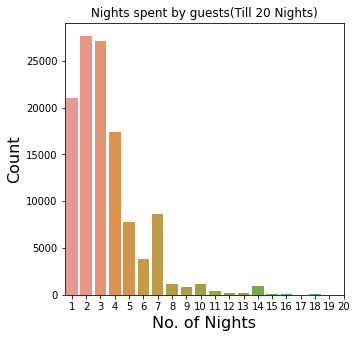

In [ ]:
#We firstly need total stay duration of the guests including stays in weekends and week Snights. 
df['total_night_stays'] = df['stays_in_weekend_nights']+ df['stays_in_week_nights']
#getting back to our seaborn plot 
sns.countplot(x=df['total_night_stays'])
plt.xlim(0.5,20)
plt.title('Nights spent by guests(Till 20 Nights)')
plt.xlabel('No. of Nights', fontsize=16)
plt.ylabel('Count', fontsize=16)

Takeaway: We can clearly see that most of the guests (comprises of almost 80 percent of the guests) stayed for 1,2,3,4 and 5 nights.

Now, let's find the duration of stay for each hotel 


Text(0, 0.5, 'Count')

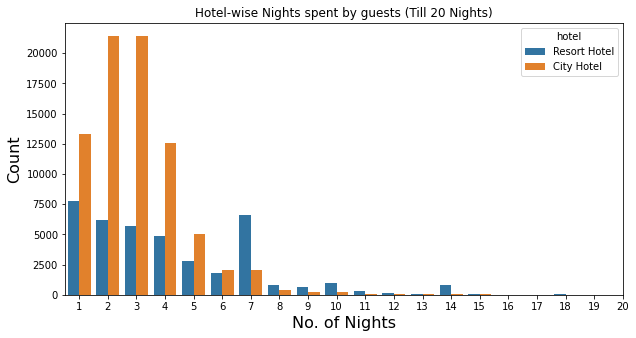

In [ ]:
plt.rcParams['figure.figsize']= 10,5
sns.countplot(data=df, x= 'total_night_stays', hue= 'hotel') #using original df 
plt.xlim(0.5,20)
plt.title('Hotel-wise Nights spent by guests (Till 20 Nights)')
plt.xlabel('No. of Nights', fontsize=16)
plt.ylabel('Count', fontsize=16)

* Takeaway 1 : For City Hotel, most of their guests stayed back for 2 or 3 days. 
*Takeaway 2: For Resort Hotel, most of their guests stayed back for 1 or 7 days. 

# *STEP-11 : SPECIAL REQUEST QUEST*

In [ ]:
#We just have to select all the values of special requests which are greater than 0, i.e. when atleast one request has been made. 
#using groupby by hotel, we can easily count them 
df_special_requests_hotel_wise= df[['hotel', 'total_of_special_requests']][df['total_of_special_requests']>0].groupby('hotel').count()

Text(0, 0.5, ' ')

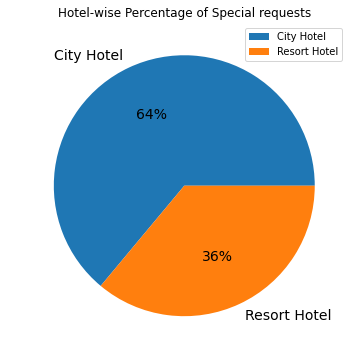

In [ ]:
plt.rcParams['figure.figsize']= 6,6
df_special_requests_hotel_wise.plot(kind='pie', autopct='%.0f%%', fontsize= 14, subplots= True)
plt.title('Hotel-wise Percentage of Special requests')
plt.ylabel(' ')

* Eureka! Eureka! The City Hotel guests made a total of 64 percentage of total special requests while The Resort Hotel guests made only 36 percent of the total. But, as we earlier saw the total number of guests are also in a similar ratio as the requests, so it might not yield a valuable output. However, City Hotel staff can expect more special requests by their guests than the Resort Hotel staff.


# *STEP-12 : DEPOSIT TYPE QUEST*

We missed defining the guests on basis of their deposit type. Let's have a look!

Text(0, 0.5, 'Count of Guests')

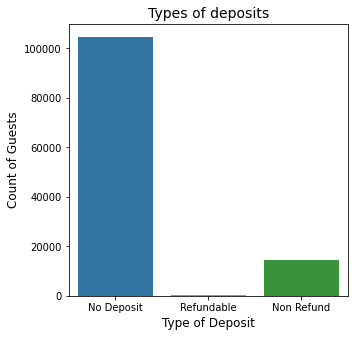

In [ ]:
plt.rcParams['figure.figsize']= 5,5
sns.countplot(data = df, x = 'deposit_type')
plt.title('Types of deposits', fontsize = 14)
plt.xlabel('Type of Deposit', fontsize = 12)
plt.ylabel('Count of Guests', fontsize = 12)

In [ ]:
#let's also check the 'No Deposit' bookings by Hotel
df[['deposit_type', 'hotel']][df['deposit_type']=='No Deposit'].groupby('hotel').count()

,deposit_type
hotel,
City Hotel,66442
Resort Hotel,38199


* If we quickly gauge by observation then Percentage of 'No Deposit' over Total Bookings for Resort Hotel '(38199/40060)x100' is more than City Hotel (66442/79330)x100. 
* We can see, that most of the guests preferred booking with No Deposit.A few with Non-refundable deposit and a very few with Refundable Deposit. 
* The people opting for Non-Refundable Deposit, what do you think why would they choose this risky option as in case of any urgency, they might have to cancel their bookings and they will not be eligible for their deposit amount. Are they so sure about the travel plan? Are they from the rich class?    

# *STEP-13 : DAILY RATE QUEST*

Whether you belong to a rich class or a lower one, you could always be looking for the **best deal**. I can it an Optimised deal on which you are happily agreed upon. So, as we are given the 'adr' value or average daily rate for the hotels. Let's crack this one!

* Point 1: I am going by the logic that as there are 3 categories of guests adults, children and babies right? Also, a guest entity for me is count(adults+children+babies)and the 'adr' value which we have in the data is a combined value. Now, we will have to find out adr value for each person who is staying in the hotel room as a guest entity. 
* Point 2: I am counting babies to be toddlers and they come alongwith their parents, in our case adults. hence, need not to be considered under any pricing charged by the hotel.
* Point 3: Also, I am counting children as a guest under guest entity. 

* Our, Final Count for Guest Entity becomes= count(adults+children)



In [ ]:
# writing formula for 'average daily rate per person' rounded up to 2 decimal values
df['adr_pp'] = round(df['adr'] / (df['adults'] + df['children']), 2)

In [ ]:
df.head() #checking if the new column has been added 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation,total_night_stays,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,not_canceled,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,not_canceled,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,not_canceled,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,not_canceled,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,not_canceled,2,49.0


Text(0.5, 1.0, 'Average daily rate per person for each month')

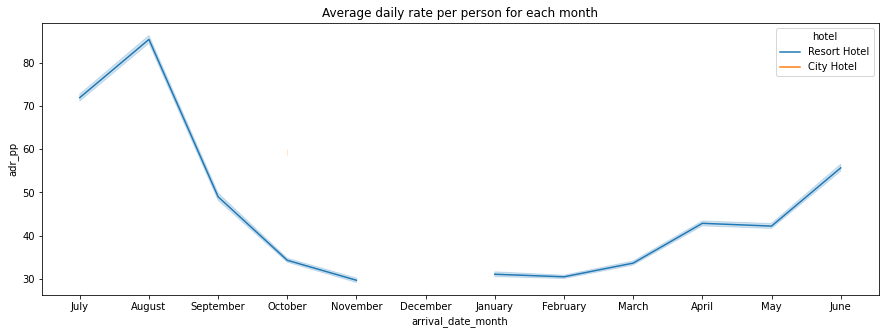

In [ ]:
plt.rcParams['figure.figsize']= 15,5
sns.lineplot(data= df, x= df['arrival_date_month'], y= df['adr_pp'], hue='hotel')
plt.title('Average daily rate per person for each month')

* adr_pp plot is not giving any valuable output through which we can culminate on each hotel pricing. Let's calculate the price paid by a guest entity for their stay and try to get a visualisation of it. 

In [ ]:
df_not_canceled_guests= df.loc[df["is_canceled"] == 0] #now lets make a subset of our dataframe by filtering it by not_canceled guests

In [ ]:
df['price'] = df_not_canceled_guests['adr'] * df_not_canceled_guests['total_night_stays'] #adding the price column to the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation,total_night_stays,adr_pp,price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,not_canceled,0,0.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,not_canceled,0,0.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,not_canceled,1,75.0,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,not_canceled,1,75.0,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,not_canceled,2,49.0,196.0


Text(0, 0.5, 'Price Paid for Stay')

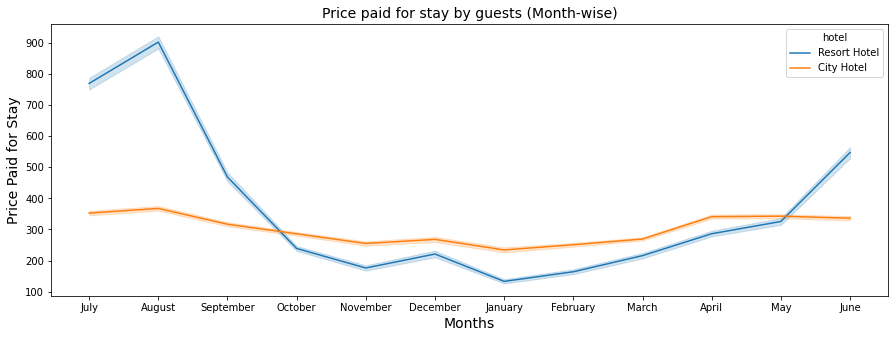

In [ ]:
plt.rcParams['figure.figsize']= 15,5
sns.lineplot(data= df, x= df['arrival_date_month'], y= df['price'], hue='hotel')
plt.title('Price paid for stay by guests (Month-wise)', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Price Paid for Stay', fontsize=14 )


Phew, that was difficult !

So, now we can culminate on two things fearlessly:
* The price variance and standard deviation for City Hotel is lower than Resort Hotel
* The prices of Resort Hotel are more than City Hotel in the months of July, August,September and June. For rest of the months, Prices of City Hotel are consistently higher than Resort Hotel. 

At last, let's see the correlation between the column variables using a heatmap

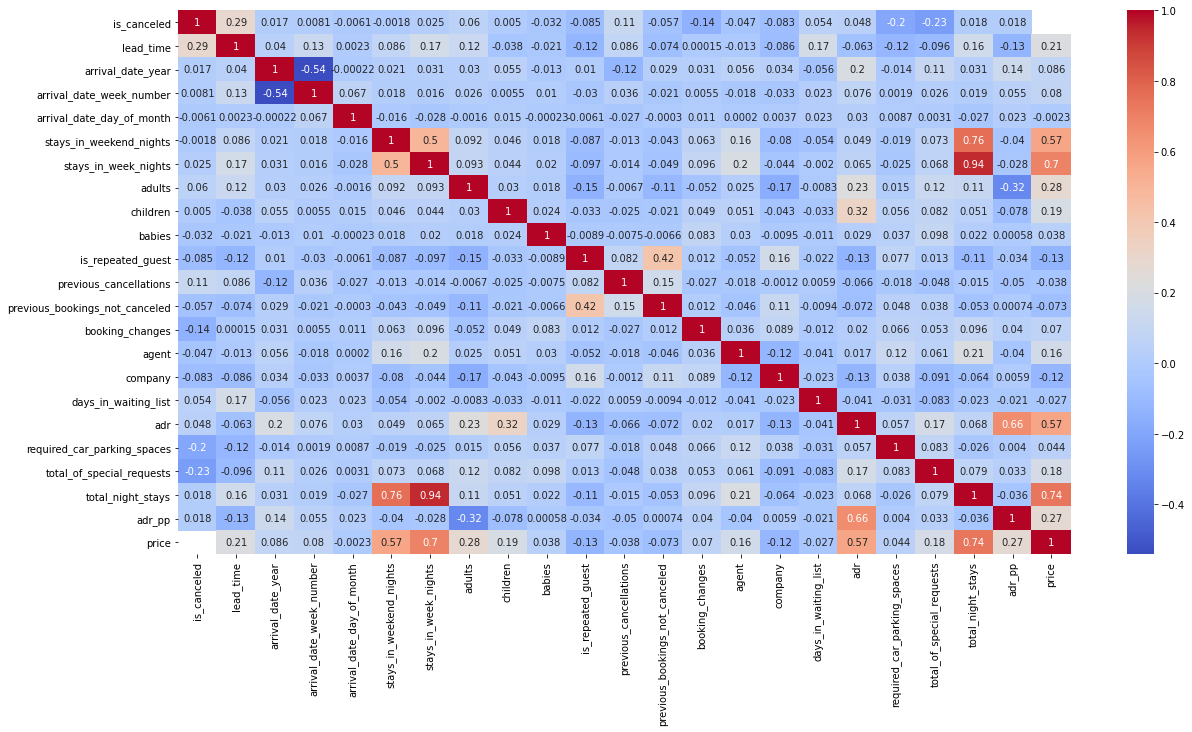

In [ ]:
plt.rcParams['figure.figsize']= 20,10
sns.heatmap(df.corr(), cmap= 'coolwarm' ,annot=True);

* Focus on total_night_stays & stays_in_weekend_nights  and total_night_stays & stays_in_week_nights . Here we can again verify that, stay in week was more than the weekends as total night stays!! Did you notice, that?

#*SUMMARY OF CONCLUSIONS*

* City Hotel is the most booked hotel with 62 percent not_canceled bookings. 
* Resort Hotel is preferred over City Hotel by Adults and childrens.
* Resort Hotel  has been preferred over City Hotel by larger group of guests or families.
* City Hotel canceled bookings is almost thrice the canceled booking of Resort Hotel. This might be due to no cancelation charges or no-deposit booking allowed by them.  
* Year 2016 observed most number of Bookings for the Hotels cumulatively. 
* Month of August saw most number of arrivals in either of the hotels. So, if you want to be accompanied by a large number of co-guests then choose August for your visit. 
* Also, guests are observed to be spending more week nights than weekend nights. 
* City Resort could be tagged as a "Duo/Couple-Friendly Hotel" & "Children-Friendly Hotel". Whereas, Resort Hotel could be tagged as "Babies-Friendly Hotel"
* Arrival of guests is pretty high almost 75 percent and above from the countries with code: DEU, ESP, FRA, GBR and PRT
* There are very few repeated guests in each hotels. 
* For City Hotel, most of their guests stayed back for 2 or 3 days.For Resort Hotel, most of their guests stayed back for 1 or 7 days.
* The City Hotel guests made a total of 64 percentage of total special requests while The Resort Hotel guests made only 36 percent of the total.
* City Hotel allows more No Deposit Bookings in count than Resort Hotel. But, the Percentage of No Deposit Bookings over total bookings is higher for Resort Hotel. 
* The price variance and standard deviation for City Hotel is lower than Resort Hotel. The prices of Resort Hotel are more than City Hotel in the months of July, August,September and June. For rest of the months, Prices of City Hotel are consistently higher than Resort Hotel.


#*VARIABLES GLOSSARY*

hotel 
* Two hotels are given:
* Resort Hotel
* City Hotel

is_canceled
* 1: Canceled
* 0: Not canceled

cancelation
* 0 as not_canceled 
* 1 as canceled 

df_not_canceled_guests 
* dataframe with just not_canceled bookings

lead_time
* gap between booking and arrival

arrival_date_year
* arrival year 

arrival_date_month
* arrival month

arrival_date_week_number
* arrival week 

arrival_date_day_of_month
* arrival date 

stays_in_weekend_nights
* count of nights the guests booked the hotel during Sat-Sun

stays_in_week_nights
* count of nights the guests booked the hotel during Mon-Fri

total_stay_nights 
* duration of stay including weekend nights and week nights stay

adults
* count of adults

children
* count of children

babies
* count of babies

meal
* meal type
(no meal package; BB; HB; FB)

country 
* country of guests

df_country_guests_top10 
* top10 countries with most visitors

market_segment 

* TA: Travel agents
* TO: Tour operators

distribution_channel 


is_repeated_guest 
* 1: Yes
* 0: No

previous_cancellations

* count of previous bookings that were cancelled by the customer before final booking 

previous_bookings_not_canceled
* count of no canceled bookings

reserved_room_type
* booked room category

assigned_room_type
* assigned room category

booking_changes
* count of changes made by the customer before final booking 

deposit_type
* type of deposit made by the customer 

agent
* travel agent id 

company
* booking company id

days_in_waiting_list
* count of days the booking was in the waiting list before it was confirmed 

customer_type 
* Transient 
* Contract
* Group 
* Transient-party 

adr
* average daily rate for the booking

price
* total price spent by a guest entity

required_car_parking_spaces

* count of car parking spaces alloted by the customer

total_of_special_requests
* count of special requests made by the customer

reservation_status
* status of reservation

reservation_status_date

* date corresponding to status of reservation 

You have reached **THE END**  -----------